In [120]:
# Imports required for the project
import scipy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [121]:
# Importing Health Rankings Data for all the counties in the state of Tennessee during the year 2020
df_hd_2020 = pd.read_excel('2020 County Health Rankings Tennessee Data - v1_0.xlsx', sheet_name = 'Ranked Measure Data', header = 1)

In [122]:
# Examining the columns and data format for 2020 data
df_hd_2020.head()

,FIPS,State,County,Deaths,Years of Potential Life Lost Rate,95% CI - Low,95% CI - High,Z-Score,YPLL Rate (AIAN),YPLL Rate (AIAN) 95% CI - Low,...,% Drive Alone (Hispanic) 95% CI - Low,% Drive Alone (Hispanic) 95% CI - High,% Drive Alone (White),% Drive Alone (White) 95% CI - Low,% Drive Alone (White) 95% CI - High,# Workers who Drive Alone,% Long Commute - Drives Alone,95% CI - Low.18,95% CI - High.18,Z-Score.34
0,47000,Tennessee,NaN,106691,9284.819335,9201.826678,9367.811992,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3003226,34.8,34.484762,35.115238,NaN
1,47001,Tennessee,Anderson,1369,10009.216744,9172.296429,10846.137059,-0.191017,NaN,NaN,...,63.051433,96.104685,90.291355,88.962982,91.619727,32206,35.5,32.425126,38.574874,-0.299636
2,47003,Tennessee,Bedford,859,10293.662695,9268.214914,11319.110475,-0.030413,NaN,NaN,...,53.858276,74.384149,79.837421,76.133823,83.541018,21250,34.5,30.530355,38.469645,-0.391637
3,47005,Tennessee,Benton,428,14479.256537,12232.658360,16725.854713,2.332852,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5448,27.9,22.672362,33.127638,-0.998850
4,47007,Tennessee,Bledsoe,229,8125.916328,6427.497341,9824.335316,-1.254364,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5603,52.6,43.145098,62.054902,1.273596


In [123]:
# Rename a column for consistency
df_hd_2020.rename(columns={'High School Graduation Rate': '% Completed High School'}, inplace=True)


In [124]:
# Creating a list to hold the selected variables for analysis
column_list = ['County','% Completed High School', '% Some College', '% Unemployed' , '% Children in Poverty','% Smokers','Teen Birth Rate']

In [125]:
# Creating a new dataframe for all counties in Tennessee with selected column values in the List for the year 2020. 
# Also, rounding the variables to 2 decimal places. 
df_tn_2020 = df_hd_2020[column_list].round(2)


In [126]:
# Adding an identifier column to mark the year to the data belong to.
df_tn_2020['Year'] = 2020

In [127]:
# Drop the rows containing null values
df_tn_c_2020 = df_tn_2020.dropna()

In [128]:
# Examine the cleaned data
df_tn_c_2020.head()

,County,% Completed High School,% Some College,% Unemployed,% Children in Poverty,% Smokers,Teen Birth Rate,Year
1,Anderson,92.08,57.52,3.76,21.9,20.93,34.28,2020
2,Bedford,90.89,41.29,3.75,22.8,22.69,41.59,2020
3,Benton,95.78,47.25,4.91,30.0,23.66,46.17,2020
4,Bledsoe,85.48,38.05,5.81,35.0,24.66,41.67,2020
5,Blount,94.44,58.84,3.23,13.5,21.32,28.49,2020


In [129]:
# Check for null values
df_tn_c_2020.isnull().sum()

County                     0
% Completed High School    0
% Some College             0
% Unemployed               0
% Children in Poverty      0
% Smokers                  0
Teen Birth Rate            0
Year                       0
dtype: int64

In [130]:
# Importing Health Rankings Data for all the counties in the state of Tennessee during the year 2021
df_hd_2021 = pd.read_excel('2021 County Health Rankings Tennessee Data - v1_0.xlsx', sheet_name = 'Ranked Measure Data', header = 1)

In [131]:
# Examining the columns and data format for 2021 data
df_hd_2021.head()

,FIPS,State,County,Unreliable,Deaths,Years of Potential Life Lost Rate,95% CI - Low,95% CI - High,Z-Score,YPLL Rate (AIAN),...,% Drive Alone (Hispanic) 95% CI - Low,% Drive Alone (Hispanic) 95% CI - High,% Drive Alone (White),% Drive Alone (White) 95% CI - Low,% Drive Alone (White) 95% CI - High,# Workers who Drive Alone,% Long Commute - Drives Alone,95% CI - Low.19,95% CI - High.19,Z-Score.34
0,47000,Tennessee,NaN,NaN,108615,9355.472275,9272.331266,9438.613284,NaN,3587.330244,...,70.797748,73.741288,84.539682,84.349754,84.729610,3066773,35.3,34.984762,35.615238,NaN
1,47001,Tennessee,Anderson,NaN,1447,10513.282899,9662.426196,11364.139601,0.107905,NaN,...,48.914904,86.029014,89.909849,88.274197,91.545501,31794,36.9,33.876339,39.923661,-0.193728
2,47003,Tennessee,Bedford,NaN,833,9846.356279,8866.925026,10825.787532,-0.276596,NaN,...,42.413188,63.078664,81.092765,79.233875,82.951654,21611,33.5,29.608004,37.391996,-0.507541
3,47005,Tennessee,Benton,NaN,410,14215.740084,11973.646048,16457.834120,2.242472,NaN,...,NaN,NaN,NaN,NaN,NaN,5664,30.0,23.680612,36.319388,-0.830583
4,47007,Tennessee,Bledsoe,NaN,248,7893.984233,6365.607462,9422.361004,-1.402192,NaN,...,NaN,NaN,NaN,NaN,NaN,5291,51.3,41.502218,61.097782,1.135360


In [132]:
# Creating a new dataframe for all counties in Tennessee with selected column values in the List for the year 2021. 
# Also, rounding the variables to 2 decimal places. 
df_tn_2021 = df_hd_2021[column_list].round(2)

In [133]:
# Adding an identifier column to mark the year to the data belong to.
df_tn_2021['Year'] = 2021

In [134]:
# Drop the rows containing null values
df_tn_c_2021 = df_tn_2021.dropna()

In [135]:
# Examine the cleaned data
df_tn_c_2021.head()

,County,% Completed High School,% Some College,% Unemployed,% Children in Poverty,% Smokers,Teen Birth Rate,Year
1,Anderson,86.99,57.61,3.55,21.9,24.39,33.08,2021
2,Bedford,82.08,43.63,3.70,19.2,26.27,40.75,2021
3,Benton,82.35,46.98,4.47,27.8,29.89,45.33,2021
4,Bledsoe,75.61,37.30,5.41,40.6,28.42,37.59,2021
5,Blount,89.12,58.40,3.19,14.1,21.99,25.78,2021


In [136]:
# Check for null values
df_tn_c_2021.isnull().sum()

County                     0
% Completed High School    0
% Some College             0
% Unemployed               0
% Children in Poverty      0
% Smokers                  0
Teen Birth Rate            0
Year                       0
dtype: int64

In [137]:
# Importing Health Rankings Data for all the counties in the state of Tennessee during the year 2022
df_hd_2022 = pd.read_excel('2022 County Health Rankings Tennessee Data - v2.xlsx', sheet_name = 'Ranked Measure Data', header = 1)

In [138]:
# Examining the columns and data format for 2022 data
df_hd_2022.head()

,FIPS,State,County,Unreliable,Deaths,Years of Potential Life Lost Rate,95% CI - Low,95% CI - High,Z-Score,YPLL Rate (AIAN),...,% Drive Alone (Hispanic) 95% CI - Low,% Drive Alone (Hispanic) 95% CI - High,% Drive Alone (white),% Drive Alone (white) 95% CI - Low,% Drive Alone (white) 95% CI - High,# Workers who Drive Alone,% Long Commute - Drives Alone,95% CI - Low.19,95% CI - High.19,Z-Score.34
0,47000,Tennessee,NaN,NaN,115955,9913.374486,9828.309981,9998.438990,NaN,4026.282572,...,71.127038,74.129255,83.371620,83.101586,83.641655,3103430,35.7,35.323218,36.076782,NaN
1,47001,Tennessee,Anderson,NaN,1486,10762.675303,9903.301138,11622.049468,-0.058574,NaN,...,44.642714,76.996630,88.188765,87.802199,88.575331,31784,37.6,34.114003,41.085997,-0.227599
2,47003,Tennessee,Bedford,NaN,901,10665.542058,9652.440562,11678.643553,-0.113332,NaN,...,53.947494,69.047726,81.506798,78.217627,84.795969,22217,32.7,28.857562,36.542438,-0.669415
3,47005,Tennessee,Benton,NaN,430,13904.547742,11745.503662,16063.591823,1.712633,NaN,...,NaN,NaN,NaN,NaN,NaN,5389,30.7,25.243811,36.156189,-0.849748
4,47007,Tennessee,Bledsoe,NaN,268,8151.179922,6440.671245,9861.688599,-1.530785,NaN,...,NaN,NaN,NaN,NaN,NaN,5889,41.5,31.702218,51.297782,0.124050


In [139]:
# Creating a new dataframe for all counties in Tennessee with selected column values in the List for the year 2022. 
# Also, rounding the variables to 2 decimal places. 
df_tn_2022 = df_hd_2022[column_list].round(2)

In [140]:
# Adding an identifier column to mark the year to the data belong to.
df_tn_2022['Year'] = 2022

In [141]:
# Drop the rows containing null values
df_tn_c_2022 = df_tn_2022.dropna()

In [142]:
# Examine the cleaned data
df_tn_c_2022.head()

,County,% Completed High School,% Some College,% Unemployed,% Children in Poverty,% Smokers,Teen Birth Rate,Year
1,Anderson,88.61,61.52,6.73,17.5,23.1,31.53,2022
2,Bedford,83.49,46.95,7.94,20.2,24.4,38.97,2022
3,Benton,83.38,50.32,8.18,24.5,27.8,41.41,2022
4,Bledsoe,78.42,29.31,8.61,25.8,27.2,40.11,2022
5,Blount,89.42,57.92,6.40,12.8,22.5,24.32,2022


In [143]:
# Check for null values
df_tn_c_2022.isnull().sum()

County                     0
% Completed High School    0
% Some College             0
% Unemployed               0
% Children in Poverty      0
% Smokers                  0
Teen Birth Rate            0
Year                       0
dtype: int64

In [144]:
# Importing Health Rankings Data for all the counties in the state of Tennessee during the year 2023
df_hd_2023 = pd.read_excel('2023 County Health Rankings Tennessee Data - v3.xlsx', sheet_name = 'Ranked Measure Data', header = 1)

In [145]:
# Examining the columns and data format for 2023 data
df_hd_2023.head()

,FIPS,State,County,Unreliable,Deaths,Years of Potential Life Lost Rate,95% CI - Low,95% CI - High,Z-Score,YPLL Rate (AIAN),...,% Drive Alone (Hispanic) 95% CI - Low,% Drive Alone (Hispanic) 95% CI - High,% Drive Alone (White),% Drive Alone (White) 95% CI - Low,% Drive Alone (White) 95% CI - High,# Workers who Drive Alone,% Long Commute - Drives Alone,95% CI - Low.19,95% CI - High.19,Z-Score.33
0,47000,Tennessee,NaN,NaN,115955,9913.374486,9828.309981,9998.438990,NaN,4026.282572,...,71.089486,73.238376,81.848061,81.580687,82.115435,3155978,36.0,35.570402,36.429598,NaN
1,47001,Tennessee,Anderson,NaN,1486,10762.675303,9903.301138,11622.049468,-0.058574,NaN,...,43.403733,79.114786,87.030312,85.626798,88.433826,32282,38.8,35.241454,42.358546,-0.202432
2,47003,Tennessee,Bedford,NaN,901,10665.542058,9652.440562,11678.643553,-0.113332,NaN,...,37.486414,75.441763,79.007215,76.416135,81.598295,22072,34.8,30.555554,39.044446,-0.557412
3,47005,Tennessee,Benton,NaN,430,13904.547742,11745.503662,16063.591823,1.712633,NaN,...,NaN,NaN,NaN,NaN,NaN,5586,36.6,29.605643,43.594357,-0.397671
4,47007,Tennessee,Bledsoe,NaN,268,8151.179922,6440.671245,9861.688599,-1.530785,NaN,...,NaN,NaN,NaN,NaN,NaN,5624,45.7,36.010766,55.389234,0.409909


In [146]:
# Rename a column for consistency
df_hd_2023.rename(columns={'% Adults Reporting Currently Smoking': '% Smokers'}, inplace=True)

In [147]:
# Creating a new dataframe for all counties in Tennessee with selected column values in the List for the year 2023. 
# Also, rounding the variables to 2 decimal places. 
df_tn_2023 = df_hd_2023[column_list].round(2)

In [148]:
# Adding an identifier column to mark the year to the data belong to.
df_tn_2023['Year'] = 2023

In [149]:
# Drop the rows containing null values
df_tn_c_2023 = df_tn_2023.dropna()

In [150]:
# Examine the cleaned data
df_tn_c_2023.head()

,County,% Completed High School,% Some College,% Unemployed,% Children in Poverty,% Smokers,Teen Birth Rate,Year
1,Anderson,89.86,63.78,3.83,18.7,22.4,31.53,2023
2,Bedford,83.78,45.40,4.11,20.3,23.4,38.97,2023
3,Benton,84.76,46.83,4.77,29.1,26.5,41.41,2023
4,Bledsoe,76.56,28.71,5.22,28.9,27.4,40.11,2023
5,Blount,89.77,55.83,3.44,13.9,22.0,24.32,2023


In [151]:
# Check for null values
df_tn_c_2023.isnull().sum()

County                     0
% Completed High School    0
% Some College             0
% Unemployed               0
% Children in Poverty      0
% Smokers                  0
Teen Birth Rate            0
Year                       0
dtype: int64

In [152]:
# Importing Health Rankings Data for all the counties in the state of Tennessee during the year 2024
df_hd_2024 = pd.read_excel('2024 County Health Rankings Tennessee Data - v2.xlsx', sheet_name = 'Select Measure Data', header = 1)

In [153]:
# Examining the columns and data format for 2024 data
df_hd_2024.head()

,FIPS,State,County,Unreliable,Deaths,Years of Potential Life Lost Rate,95% CI - Low,95% CI - High,National Z-Score,YPLL Rate (Hispanic (all races)),...,% Drive Alone (Hispanic) 95% CI - Low,% Drive Alone (Hispanic) 95% CI - High,% Drive Alone (White),% Drive Alone (White) 95% CI - Low,% Drive Alone (White) 95% CI - High,# Workers who Drive Alone,% Long Commute - Drives Alone,95% CI - Low.19,95% CI - High.19,National Z-Score.33
0,47000,Tennessee,NaN,NaN,129488,11043.406354,10954.374388,11132.438321,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3213248,36.1,35.723218,36.476782,NaN
1,47001,Tennessee,Anderson,NaN,1652,12120.129172,11203.182835,13037.075509,0.627538,NaN,...,45.163827,72.116626,85.299840,83.751863,86.847817,32457,38.7,34.864959,42.535041,0.438432
2,47003,Tennessee,Bedford,NaN,983,11553.691861,10514.579944,12592.803778,0.463356,7431.056278,...,43.159119,57.473125,74.710859,70.160396,79.261322,22971,36.3,31.699246,40.900754,0.248841
3,47005,Tennessee,Benton,NaN,466,13817.894749,11650.454523,15985.334975,1.119638,NaN,...,NaN,NaN,NaN,NaN,NaN,5834,35.5,28.825532,42.174468,0.185644
4,47007,Tennessee,Bledsoe,NaN,285,8959.109113,7148.147180,10770.071047,-0.288688,NaN,...,NaN,NaN,NaN,NaN,NaN,5497,52.2,41.174377,63.225623,1.504881


In [154]:
# Rename a column for consistency
df_hd_2024.rename(columns={'% Adults Reporting Currently Smoking': '% Smokers'}, inplace=True)

In [155]:
# Creating a new dataframe for all counties in Tennessee with selected column values in the List for the year 2024. 
# Also, rounding the variables to 2 decimal places. 
df_tn_2024 = df_hd_2024[column_list].round(2)

In [156]:
# Adding an identifier column to mark the year to the data belong to.
df_tn_2024['Year'] = 2024

In [157]:
# Drop the rows containing null values
df_tn_c_2024 = df_tn_2024.dropna()

In [158]:
# Examine the cleaned data
df_tn_c_2024.head()

,County,% Completed High School,% Some College,% Unemployed,% Children in Poverty,% Smokers,Teen Birth Rate,Year
1,Anderson,90.87,62.34,3.32,15.9,21.1,27.65,2024
2,Bedford,85.03,47.53,3.40,17.9,22.6,40.25,2024
3,Benton,84.68,47.48,4.12,24.8,26.2,35.74,2024
4,Bledsoe,78.11,26.61,5.30,32.1,26.5,39.63,2024
5,Blount,90.43,57.71,3.12,12.0,19.6,22.21,2024


In [159]:
# Check for null values
df_tn_c_2024.isnull().sum()

County                     0
% Completed High School    0
% Some College             0
% Unemployed               0
% Children in Poverty      0
% Smokers                  0
Teen Birth Rate            0
Year                       0
dtype: int64

In [160]:
# Cteate a new data frame by combining all the 5 dataframes containing the past 5 years of health data 
# for the state of Tennessee
df_tn_c = pd.concat([df_tn_c_2020, df_tn_c_2021, df_tn_c_2022, df_tn_c_2023, df_tn_c_2024])

In [161]:
# Filter and create a new data frame containing the past 5 years of Health Rankings Data for the Shelby County
df_tn_c_shelby = df_tn_c[df_tn_c['County'] == 'Shelby']

In [162]:
# Check the Shelby County Health data for data consistency
df_tn_c_shelby

,County,% Completed High School,% Some College,% Unemployed,% Children in Poverty,% Smokers,Teen Birth Rate,Year
79,Shelby,80.34,62.14,4.15,33.2,20.10,38.61,2020
79,Shelby,88.41,62.65,4.02,25.7,21.14,36.42,2021
79,Shelby,89.06,63.33,9.66,27.1,19.70,34.82,2022
79,Shelby,89.28,62.97,6.81,23.9,18.60,34.82,2023
79,Shelby,89.64,63.56,4.52,23.5,19.20,31.47,2024


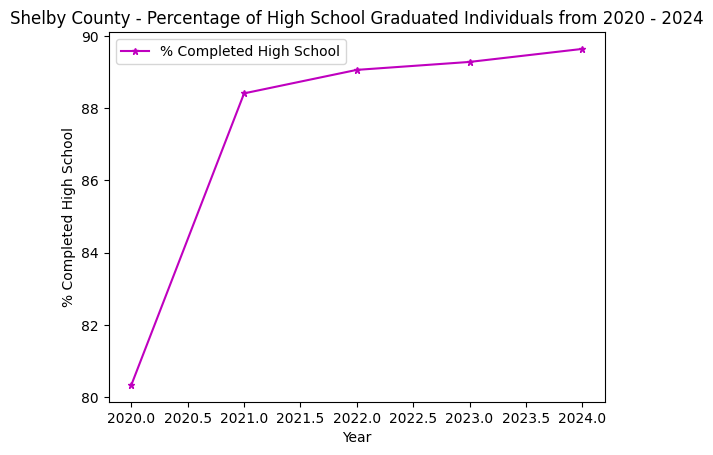

In [163]:
# Line chart displaying the 5 year trend of High School Graduation Rate from 2020 - 2024 in Shelby County
x = df_tn_c_shelby['Year']
y = df_tn_c_shelby['% Completed High School']

plt.plot(x,y,label='% Completed High School',color='m', marker='*', markersize=5)
plt.xlabel('Year')
plt.ylabel('% Completed High School')
plt.title('Shelby County - Percentage of High School Graduated Individuals from 2020 - 2024')
plt.legend()
plt.show()

Discussion : In Shelby County there is an 8-point increase in the year 2020. Then, after that there was a slow upward trend for the High school graduation percentage.

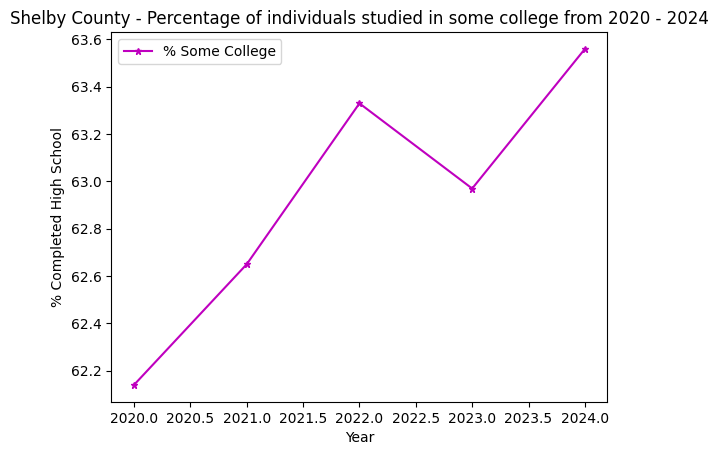

In [164]:
# Line chart displaying the 5 year trend of Some College Graduation Rate from 2020 - 2024 in Shelby County
x = df_tn_c_shelby['Year']
y = df_tn_c_shelby['% Some College']

plt.plot(x,y,label='% Some College',color='m', marker='*', markersize=5)
plt.xlabel('Year')
plt.ylabel('% Completed High School')
plt.title('Shelby County - Percentage of individuals studied in some college from 2020 - 2024')
plt.legend()
plt.show()

Discussion - From the year 2020 to 2024, there is an overall upward trend in some college graduation rates, despite the small drop from 2022 to 2023.

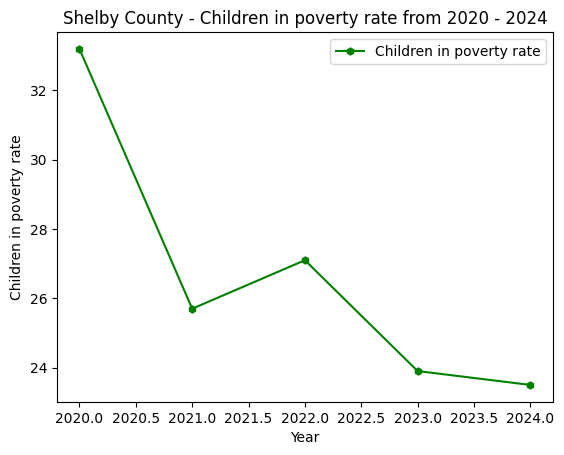

In [165]:
# Line chart displaying the 5 year trend of Children in Poverty Rate from 2020 - 2024 in Shelby County
x1 = df_tn_c_shelby['Year']
y1 = df_tn_c_shelby['% Children in Poverty']

plt.plot(x1,y1,label='Children in poverty rate',color='g', marker='h', markersize=5)
plt.xlabel('Year')
plt.ylabel('Children in poverty rate')
plt.title('Shelby County - Children in poverty rate from 2020 - 2024')
plt.legend()
plt.show()

Discussion - In the above chart, the children is poverty rate followed a downward trend from 2020 to 2024 in Shelby County. This is the direct opposite trend from the high school graduation rate. This clearly shows that the increase in education rate in Shelby County improves the quality of life for children living in Shelby County.

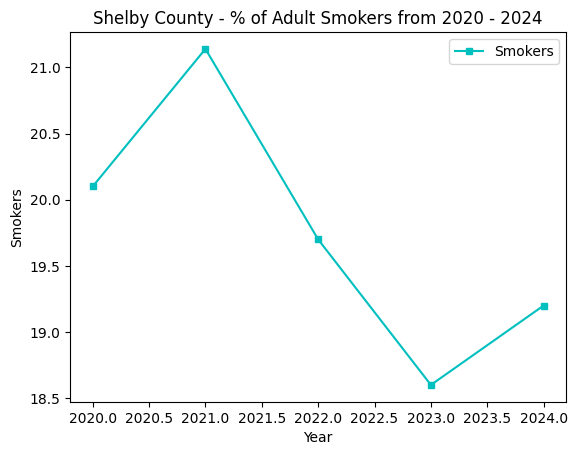

In [166]:
# Line chart displaying the 5 year trend of Adult Smokers Rate from 2020 - 2024 in Shelby County
x1 = df_tn_c_shelby['Year']
y1 = df_tn_c_shelby['% Smokers']

plt.plot(x1,y1,label='Smokers',color='c', marker='s', markersize=5)
plt.xlabel('Year')
plt.ylabel('Smokers')
plt.title('Shelby County - % of Adult Smokers from 2020 - 2024')
plt.legend()
plt.show()

Discussion: The adult smokers' rate reduced from above 20% to below 20% from the years 2020 to 2024. Even though there is an overall reduced percentage, the trend did not strictly follow the downward path over the past 5 years. The effect of education is somewhat less impactful on the smoking rate when compared to children in poverty rate. 

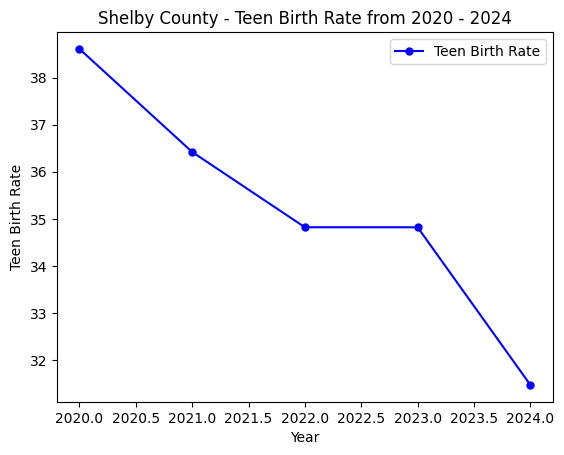

In [167]:
# Line chart displaying the 5 year trend of Teen Birth Rate from 2020 - 2024 in Shelby County
x = df_tn_c_shelby['Year']
y = df_tn_c_shelby['Teen Birth Rate']

plt.plot(x,y,label='Teen Birth Rate',color='b', marker='o', markersize=5)
plt.xlabel('Year')
plt.ylabel('Teen Birth Rate')
plt.title('Shelby County - Teen Birth Rate from 2020 - 2024')
plt.legend()
plt.show()

Discussion - Similar to the children in poverty rate, the teen birth rate also followed a downward trend from 2020 to 2024 in Shelby County. This is the direct opposite trend from the high school graduation rate. This clearly shows that the increase in education rate in Shelby County helps teens make better choices in life so that they can establish themselves in a better position to provide a bright future for their kids.

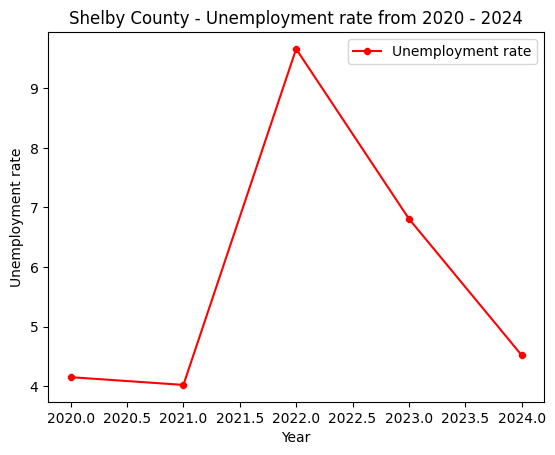

In [168]:
# Line chart displaying the 5 year trend of Unemployment Rate from 2020 - 2024 in Shelby County
x = df_tn_c_shelby['Year']
y = df_tn_c_shelby['% Unemployed']


plt.plot(x,y,label='Unemployment rate',color='r', marker='8', markersize=5)
plt.xlabel('Year')
plt.ylabel('Unemployment rate')
plt.title('Shelby County - Unemployment rate from 2020 - 2024')
plt.legend()
plt.show()

Discussion: We could see a sudden rise in unemployment from the year 2021 to 2022, and for the past 2 years, the unemployment rate has been trending downwards, but still has not reached the same level as in 2020.

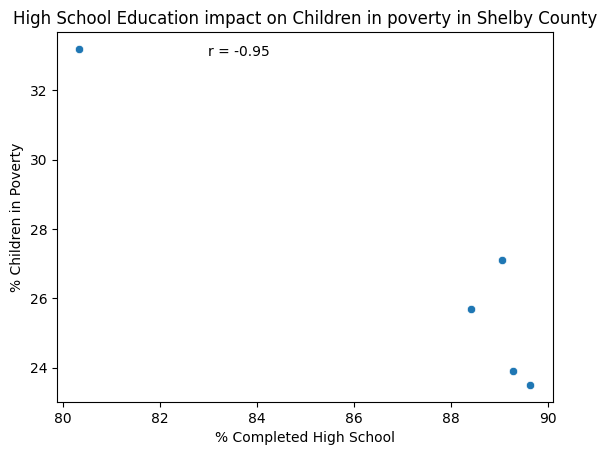

In [169]:
#calculate correlation coefficient between High School Graduation and Children in Poverty
r_h_p = scipy.stats.pearsonr(x=df_tn_c_shelby['% Completed High School'], y=df_tn_c_shelby['% Children in Poverty'])[0]

#create scatterplot
sns.scatterplot(data=df_tn_c_shelby, x=df_tn_c_shelby['% Completed High School'], y=df_tn_c_shelby['% Children in Poverty'])

#add correlation coefficient to plot
plt.text(83, 33, 'r = ' + str(round(r_h_p, 2)), fontsize=10)

#Add title
plt.title('High School Education impact on Children in poverty in Shelby County');



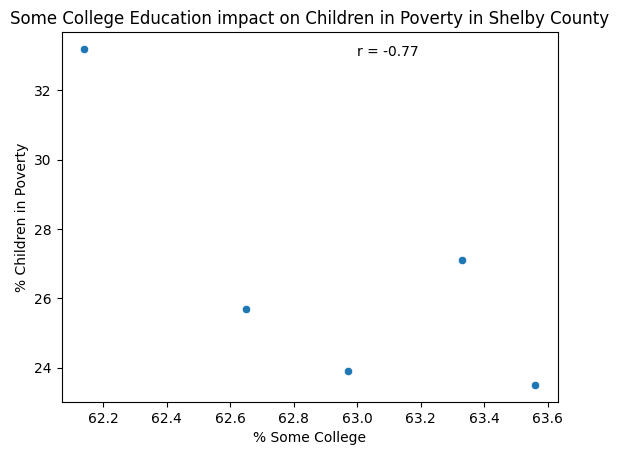

In [170]:
#calculate correlation coefficient between College Gaduation and Children in Poverty
r_c_p = scipy.stats.pearsonr(x=df_tn_c_shelby['% Some College'], y=df_tn_c_shelby['% Children in Poverty'])[0]

#create scatterplot
sns.scatterplot(data=df_tn_c_shelby, x=df_tn_c_shelby['% Some College'], y=df_tn_c_shelby['% Children in Poverty'])

#add correlation coefficient to plot
plt.text(63, 33, 'r = ' + str(round(r_c_p, 2)), fontsize=10)

#Add title
plt.title('Some College Education impact on Children in Poverty in Shelby County');


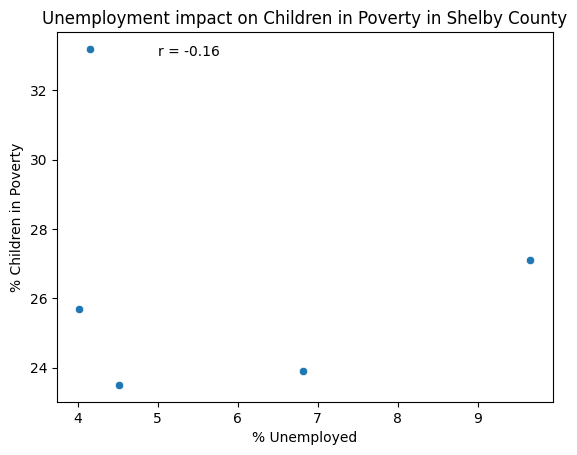

In [171]:
#calculate correlation coefficient between Unemplyment and Children in Poverty
r_u_p = scipy.stats.pearsonr(x=df_tn_c_shelby['% Unemployed'], y=df_tn_c_shelby['% Children in Poverty'])[0]

#create scatterplot
sns.scatterplot(data=df_tn_c_shelby, x=df_tn_c_shelby['% Unemployed'], y=df_tn_c_shelby['% Children in Poverty'])

#add correlation coefficient to plot
plt.text(5, 33, 'r = ' + str(round(r_u_p, 2)), fontsize=10)

#Add title
plt.title('Unemployment impact on Children in Poverty in Shelby County');

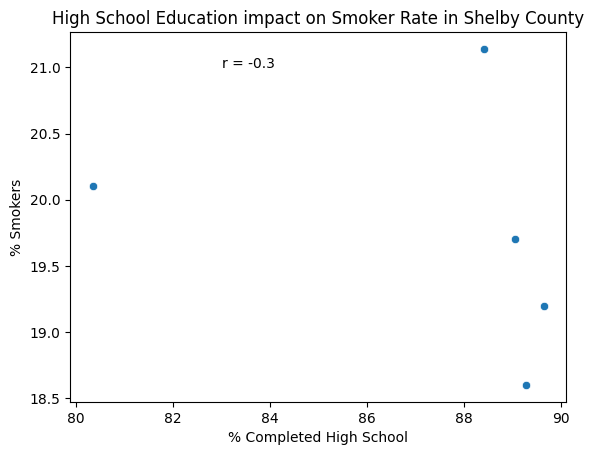

In [172]:
#calculate correlation coefficient between High School Graduation and Smoker Rate
r_h_s = scipy.stats.pearsonr(x=df_tn_c_shelby['% Completed High School'], y=df_tn_c_shelby['% Smokers'])[0]

#create scatterplot
sns.scatterplot(data=df_tn_c_shelby, x=df_tn_c_shelby['% Completed High School'], y=df_tn_c_shelby['% Smokers'])

#add correlation coefficient to plot
plt.text(83,21, 'r = ' + str(round(r_h_s, 2)), fontsize=10)

#Add title
plt.title('High School Education impact on Smoker Rate in Shelby County');

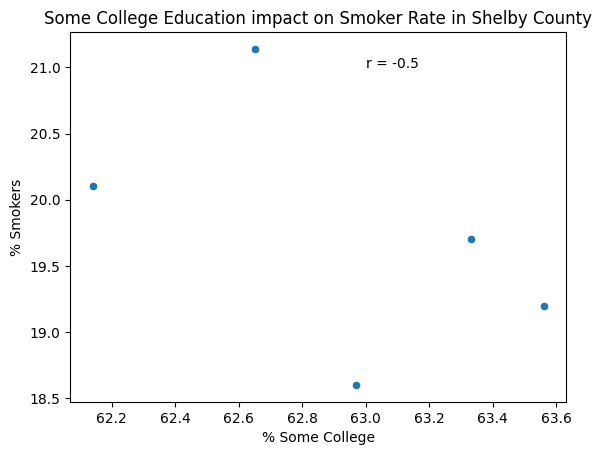

In [173]:
#calculate correlation coefficient between College Gaduation and Smoker Rate
r_c_s = scipy.stats.pearsonr(x=df_tn_c_shelby['% Some College'], y=df_tn_c_shelby['% Smokers'])[0]

#create scatterplot
sns.scatterplot(data=df_tn_c_shelby, x=df_tn_c_shelby['% Some College'], y=df_tn_c_shelby['% Smokers'])

#add correlation coefficient to plot
plt.text(63, 21, 'r = ' + str(round(r_c_s, 2)), fontsize=10)

#Add title
plt.title('Some College Education impact on Smoker Rate in Shelby County');


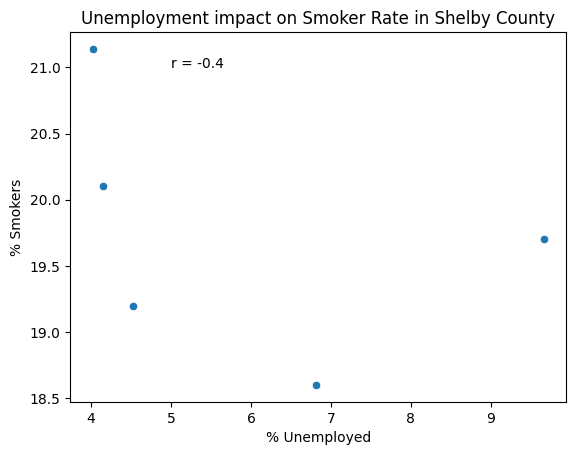

In [174]:
#calculate correlation coefficient between Unemplyment and Smoker Rate
r_u_s = scipy.stats.pearsonr(x=df_tn_c_shelby['% Unemployed'], y=df_tn_c_shelby['% Smokers'])[0]

#create scatterplot
sns.scatterplot(data=df_tn_c_shelby, x=df_tn_c_shelby['% Unemployed'], y=df_tn_c_shelby['% Smokers'])

#add correlation coefficient to plot
plt.text(5, 21, 'r = ' + str(round(r_u_s, 2)), fontsize=10)

#Add title
plt.title('Unemployment impact on Smoker Rate in Shelby County');

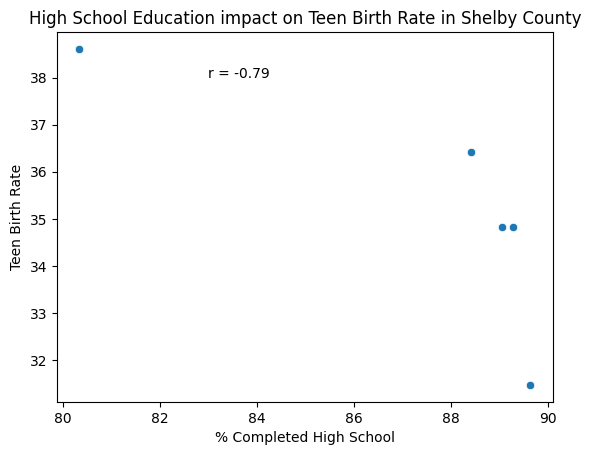

In [175]:
#calculate correlation coefficient between High School Graduation and Teen Birth Rate
r_h_b = scipy.stats.pearsonr(x=df_tn_c_shelby['% Completed High School'], y=df_tn_c_shelby['Teen Birth Rate'])[0]

#create scatterplot
sns.scatterplot(data=df_tn_c_shelby, x=df_tn_c_shelby['% Completed High School'], y=df_tn_c_shelby['Teen Birth Rate'])

#add correlation coefficient to plot
plt.text(83, 38, 'r = ' + str(round(r_h_b, 2)), fontsize=10)

#Add title
plt.title('High School Education impact on Teen Birth Rate in Shelby County');


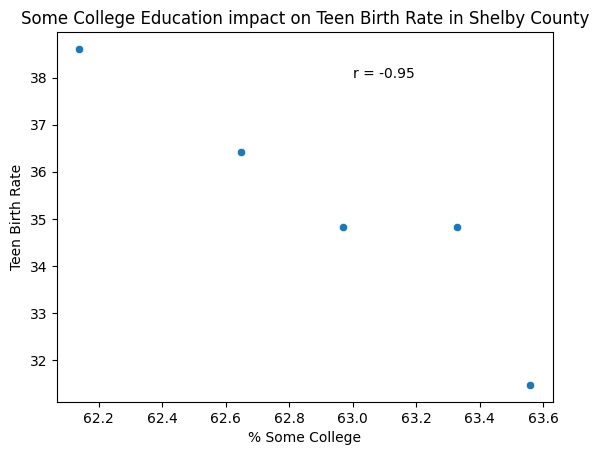

In [176]:
#calculate correlation coefficient between College Gaduation and Teen Birth Rate
r_c_b = scipy.stats.pearsonr(x=df_tn_c_shelby['% Some College'], y=df_tn_c_shelby['Teen Birth Rate'])[0]

#create scatterplot
sns.scatterplot(data=df_tn_c_shelby, x=df_tn_c_shelby['% Some College'], y=df_tn_c_shelby['Teen Birth Rate'])

#add correlation coefficient to plot
plt.text(63, 38, 'r = ' + str(round(r_c_b, 2)), fontsize=10)

#Add title
plt.title('Some College Education impact on Teen Birth Rate in Shelby County');

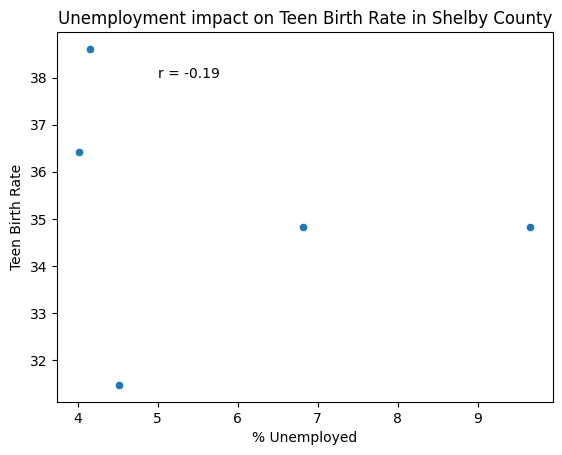

In [177]:
#calculate correlation coefficient between Unemplyment and Teen Birth Rate
r_u_b = scipy.stats.pearsonr(x=df_tn_c_shelby['% Unemployed'], y=df_tn_c_shelby['Teen Birth Rate'])[0]

#create scatterplot
sns.scatterplot(data=df_tn_c_shelby, x=df_tn_c_shelby['% Unemployed'], y=df_tn_c_shelby['Teen Birth Rate'])

#add correlation coefficient to plot
plt.text(5, 38, 'r = ' + str(round(r_u_b, 2)), fontsize=10)

#Add title
plt.title('Unemployment impact on Teen Birth Rate in Shelby County');

| Rvalues | % Highschool Grad | % Some College Grad | % Unemployment |
| -: | :-: | :-: | :-: |
| Children in Poverty | -0.95 | -0.77 | -0.16 |
| Smokers | -0.3 | -0.5 | -0.4 |
| Teen Birth Rate | -0.79 | -0.95 | -0.19 |

## Correlation Coefficient 

- +1 signifies a perfect positive correlation (as one variable increases, the other increases proportionally).
- -1 signifies a perfect negative correlation (as one variable increases, the other decreases proportionally).
- 0 signifies no linear relationship between the variables.
- 0.1 to 0.3: Weak positive correlation.
- 0.3 to 0.5: Moderate positive correlation.
- 0.5 to 1: Strong positive correlation.
- -0.1 to -0.3: Weak negative correlation.
- -0.3 to -0.5: Moderate negative correlation.
- -0.5 to -1: Strong negative correlation.

| Negative Correlation | % Highschool Grad | % Some College Grad | % Unemployment |
| -: | :-: | :-: | :-: |
| Children in Poverty | Strong | Strong | Weak |
| Smokers | Moderate | Moderate | Moderate |
| Teen Birth Rate | Strong | Strong| Weak  |

Discussion: From the above chart, we can see there is a strong negative linear relationship between education level and children in poverty rate and the teen birth rate. The relationship between education and smoking rate is only moderate. We could also conclude that the impact of unemployment on Children in poverty and the teen birth rate is minimal when compared with the impact of education on these social factors.

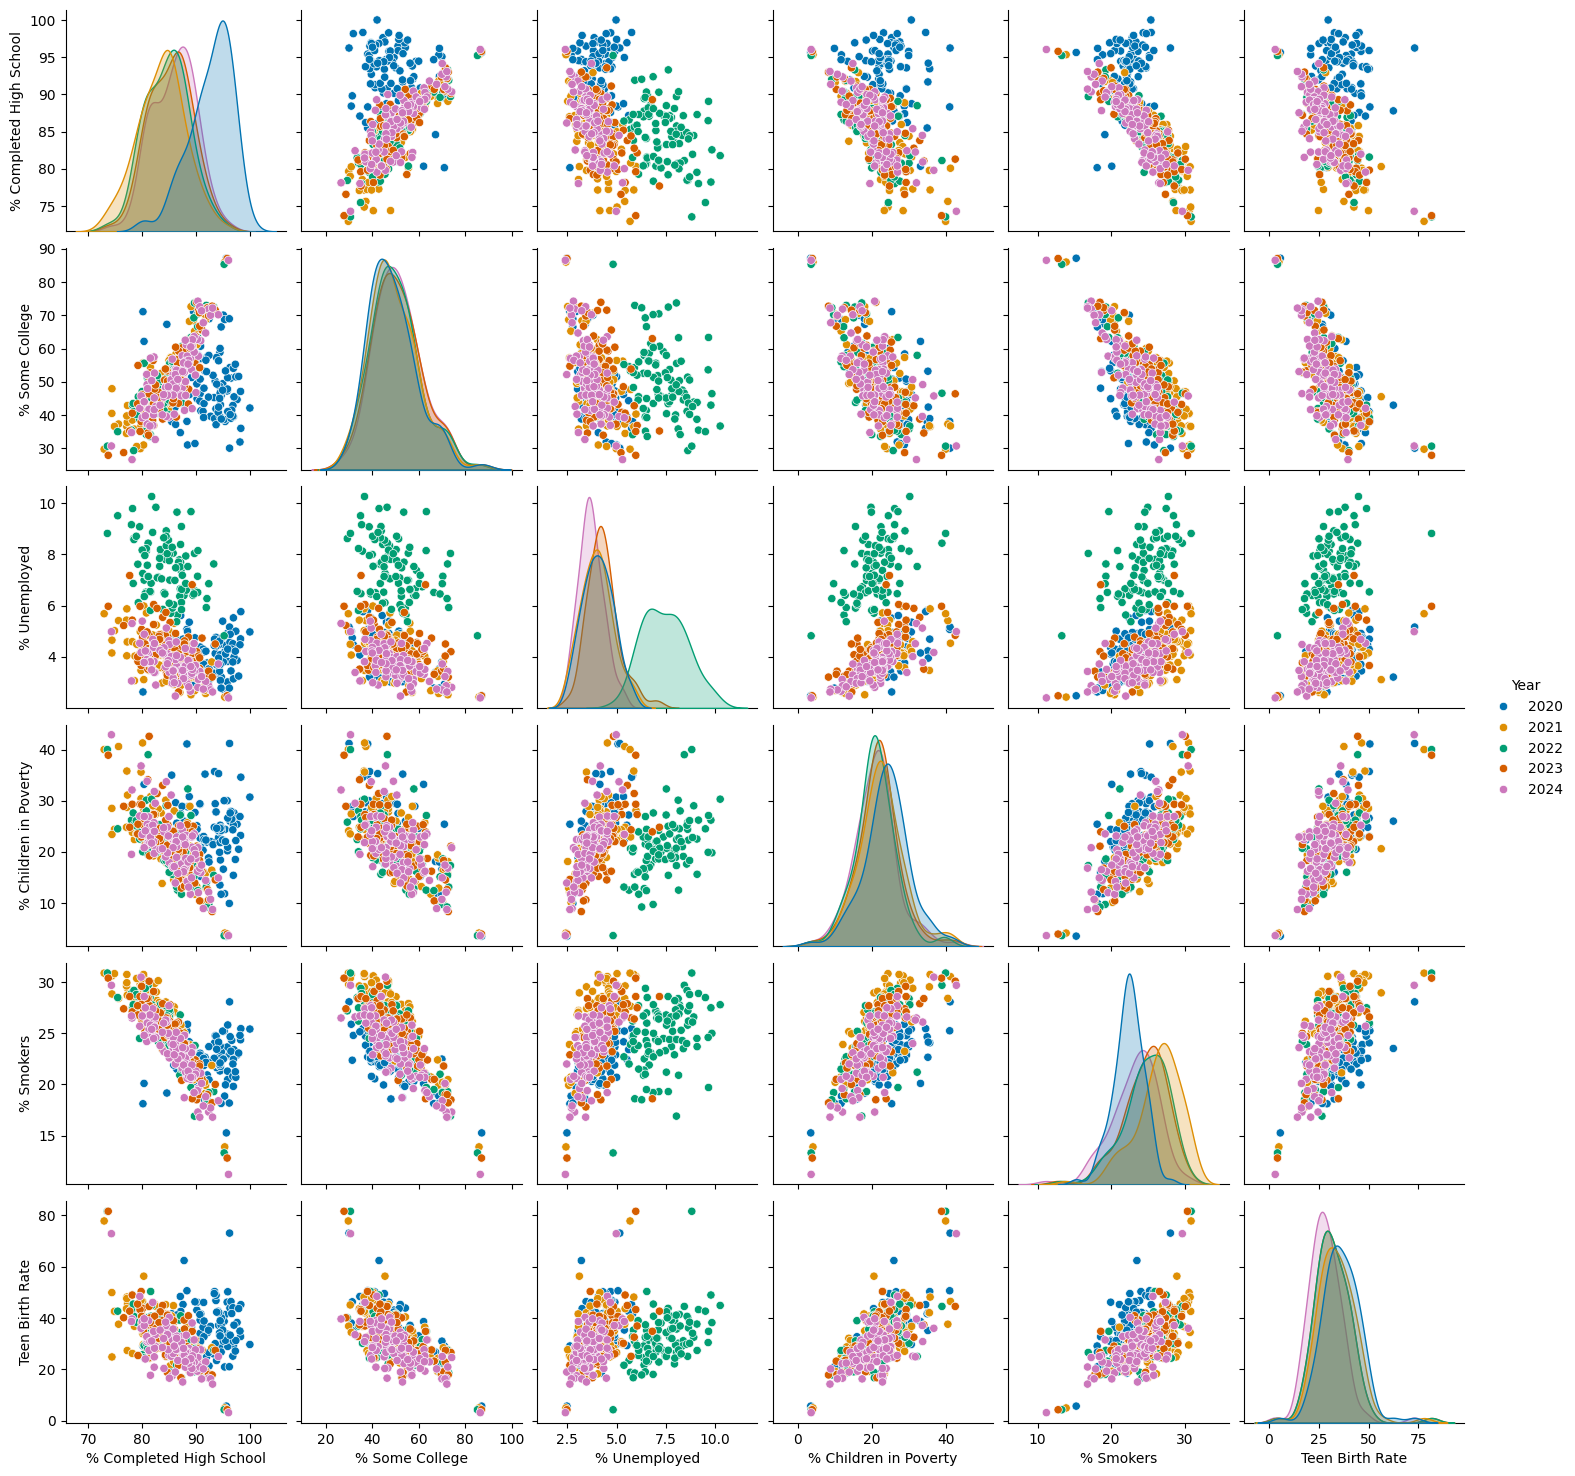

In [178]:
# Creating a multivariate chart to see the relationship between every variable 
# from the dataframe containing the health rankings data from 2020 - 2024 for all counties in Tennessee 
# and color code all the scatterplots based on the years 2020 - 2024
sns.pairplot(df_tn_c, hue = "Year", palette = "colorblind")
plt.show()